# Guía de CV y KNN

## Ejercicio 1

Armar una función que, dado un vector de datos X devuelva los valores estandarizados por alguno de los dos métodos vistos en clase.

Para practicar un poco de R voy a escribir las siguientes funciones:
* *std_df_meansd*: Estandariza las columnas de un dataframe restando la media y dividiendo por el desvío estandar. Devuelve los datos estandarizados, y la media y la varianza de los datos sin estandarizar.

* *std_df_minmax*: Estandariza las columnas de un dataframe de manera tal que quede en el intervalo [0,1]. Devuelve los datos estandarizados y el mínimo y máximo de los datos sin estandarizar.

* *destd_df_meansd*: Recibe datos estandarizados, media y varianza y recupera los datos originales.

* *destd_df_minmax*: Recibe datos estandarizados, mínimo y máximo y recupera los datos originales.

* *std_vec_meansd*: Estandariza las componentes de un vector restando la media y dividiendo por el desvío estandar. Devuelve un vector de media cero y desvío estandar uno.

* *std_vec_meansd*: Estandariza las componentes de un vector de manera tal que queden en el intervalo [0,1]. Devuelve un vector cuyo mínimo es cero y su máximo es uno.




In [1]:
std_df_meansd <- function(x){
    aux1=apply(x,2,mean)
    aux2=apply(x,2,sd)
    x_std=t(apply(x,1,function(y){(y-aux1)/aux2}))
    return(list(data=as.data.frame(x_std),mean_val=aux1,sd_val=aux2))
}

std_df_minmax <- function(x){
    aux1=apply(x, 2, min)
    aux2=apply(x, 2, max)
    x_std=t(apply(x,1,function(y){(y - aux1)/(aux2-aux1)}))
    return(list(data=as.data.frame(x_std),min_val=aux1,max_val=aux2))
}

destd_df_meansd <- function(x){
    x_destd=t(apply(x$data,1,function(y){y*x$sd_val+x$mean_val}))
    return(x_destd)
}
destd_df_minmax <- function(x){
    x_destd=t(apply(x$data,1,function(y){y*(x$max_val-x$min_val)+x$min_val}))
    return(x_destd)
}

std_vec_meansd <- function(x) {
    return ((x-mean(x))/sd(x))
}

std_vec_minmax <- function(x) {
    return ((x-min(x))/(max(x)-min(x)))
}

Voy a probar las distintas funciones realizadas

In [2]:
x=c(1,3,3,7,3,6,3,8,4,7,4,3)
std_vec_minmax(x)

[1] 0.0000000 0.2857143 0.2857143 0.8571429 0.2857143 0.7142857 0.2857143
 [8] 1.0000000 0.4285714 0.8571429 0.4285714 0.2857143

In [3]:
mean(std_vec_meansd(x))

[1] 1.387779e-16

In [4]:
sd(std_vec_meansd(x))

[1] 1

In [5]:
producto = read.table('producto.txt',header = TRUE)
head(producto)

Resultado,Precio,Marketing
exito,68.35820,147231.5
exito,87.29038,130234.6
exito,69.01173,111030.1
exito,11.59361,157175.9
exito,19.50091,179074.1
exito,46.12009,163825.2


In [6]:
a=std_df_meansd(producto[2:3])
head(a$data)
print("Medias:")
print(a$mean_val)
print("Desvíos estandar:")
print(a$sd_val)

Precio,Marketing
-0.2775411,0.7086589
0.1523208,0.2390360
-0.2627026,-0.2915837
-1.5664017,0.9834228
-1.3868635,1.5884709
-0.7824656,1.1671435


[1] "Medias:"
     Precio   Marketing 
    80.5818 121583.3024 
[1] "Desvíos estandar:"
     Precio   Marketing 
   44.04246 36192.56165 


In [7]:
a=std_df_minmax(producto[2:3])
head(a$data)
print("Mínimo:")
print(a$min_val)
print("Máximo:")
print(a$max_val)

Precio,Marketing
0.38758892,0.6548364
0.50867754,0.5334851
0.39176883,0.3963721
0.02452732,0.7258359
0.07510177,0.8821814
0.24535579,0.7733096


[1] "Mínimo:"
      Precio    Marketing 
    7.758767 55513.012093 
[1] "Máximo:"
     Precio   Marketing 
   164.1085 195576.1884 


## Ejercicio 2

Armar una función que, dada una matriz de datos X, un valor k de vecinos mas cercanos y un punto a clasificar $x_0$ devuelva la clase del punto a clasificar usando el método de vecinos mas cercanos.

In [8]:
knn <- function(data,labels,k,x0) {
    distance <- array(0,nrow(data))
    for(i in 1:nrow(data))
    { 
        distance[i] <- sqrt(sum((data[i,]- x0)^2))
    }
    idx=order(distance)
    sel_labels=t(labels)[idx[1:k]]
    return(names(which.max(table(sel_labels))))
}

In [9]:
knn(producto[2:3],producto[1],3,c(0,180000))

[1] "exito"

In [10]:
knn(producto[2:3],producto[1],3,c(150,6000))

[1] "fracaso"

## Ejercicio 3

Lleve adelante un esquema de validacion cruzada por K-fold (fije un valor de K) para los datos del archivo autos.txt, y en base a ese criterio
determine el mejor modelo entre:

a) Modelo constante  
b) Modelo lineal  
c) Mocelo cuadrático  

con Y:Calidad y X:Precio. 

Para el modelo “ganador”, obtenga la regresión y dibuje simultáneamente los datos junto con la curva de ajuste.

In [11]:
# Generación del train set
autos = read.table('autos.txt',header = TRUE)

# la siguiente función genera train y test de manera tal que divide al dataset en k partes, la parte k_i esima
# es el test set y el resto queda como train. Se utilizará para hacer k-folding
ksplit <- function(x,k=5,k_i=1) {
    size=nrow(x)
    tam=floor(size/k)
    if(k_i<k){
        train=x[-c(((k_i-1)*tam+1):(k_i*tam)),]
        test=x[c(((k_i-1)*tam+1):(k_i*tam)),]
    } else {
        train=x[-c(((k-1)*tam+1):size),]
        test=x[-c(((k-1)*tam+1):size),]
    }
    dataset=list()
    dataset$train=train
    dataset$test=test
    return(dataset)
}


In [13]:
k=5
error=0
for(k_i in 1:k) {
    data=ksplit(autos,k,k_i)
    est=mean(data$train$calidad)
    error=error+sum((data$test$calidad - est)^2) }
cat("El error cuadrático del k-folding para el promedio es:")
print(error)

error=0
for(k_i in 1:k) {
    data=ksplit(autos,k,k_i)
    est <- lm(calidad ~ precio, data=data$train)
    pred <- predict(est, data$test) 
    error=error+sum((pred-data$test$calidad)^2)
    }
cat("El error cuadrático del k-folding para el modelo lineal es:")
print(error)

error=0
for(k_i in 1:k) {
    autos_aux=autos
    autos_aux$precio_cuadrado=autos_aux$precio^2
    data=ksplit(autos_aux,k,k_i)
    est <- lm(calidad ~ precio+precio_cuadrado, data=data$train)
    pred <- predict(est, data$test) 
    error=error+sum((pred-data$test$calidad)^2)
    }
cat("El error cuadrático del k-folding para el modelo cuadrático es:")
print(error)

El error cuadrático del k-folding para el promedio es:[1] 1417.036
El error cuadrático del k-folding para el modelo lineal es:[1] 610.9004
El error cuadrático del k-folding para el modelo cuadrático es:[1] 575.8791


Por lo tanto, el modelo ganador es el modelo cuadrático. Se realizará la gráfica con la curva de ajuste para el modelo entrenado con la totalidad de los datos.

In [14]:
est <- lm(calidad ~ precio+precio_cuadrado, data=autos_aux)

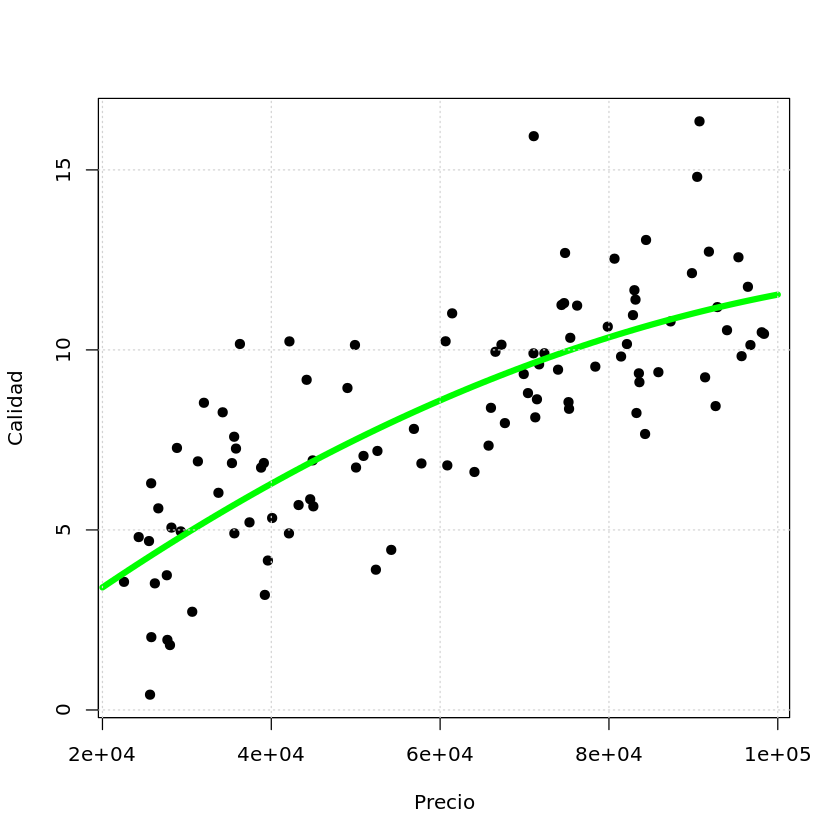

In [15]:
plot(autos_aux$precio,autos_aux$calidad,xlab = 'Precio', ylab = 'Calidad', pch = 19)
data$precio=seq(20000, 100000, 1000) 
data$precio_cuadrado=data$precio^2
pred <- predict(est, data)
lines(data$precio,pred,col="green",lwd=5)
grid()

## Ejercicio 4
En el archivo productos.txt tenemos un registro de productos que fueron exitosos y otros que fracasaron, junto con información de su precio y de su presupuesto en marketing.  

a. Levantar los datos del archivo y graficarlos, en negro los productos “exitosos” y en rojo los “fracasados”.  
b. Para determinar un valor óptimo k de vecinos más cercanos se propone:
1. Estandarizar el total de los datos con alguno de los dos esquemas
propuestos.  
2. Particionar el conjunto en un training y un testing set.  
3. Para un valor de k y un mecanismo de estandarización clasificar los elementos del testing set en funci´on del training set, aplicar como función de costo la cantidad de datos incorrectamente clasificados.  
4. Repetir con diversos valores de k y elegir como modelo aquel que minimice la función de costo.  


c. Replique el ejercicio anterior con un mecanismo de K-Fold para elegir el k de vecinos más cercanos.  
d. Clasificar un producto con precio \$70 y un presupuesto de marketing de $100000 utilizando el modelo óptimo encontrado antes.

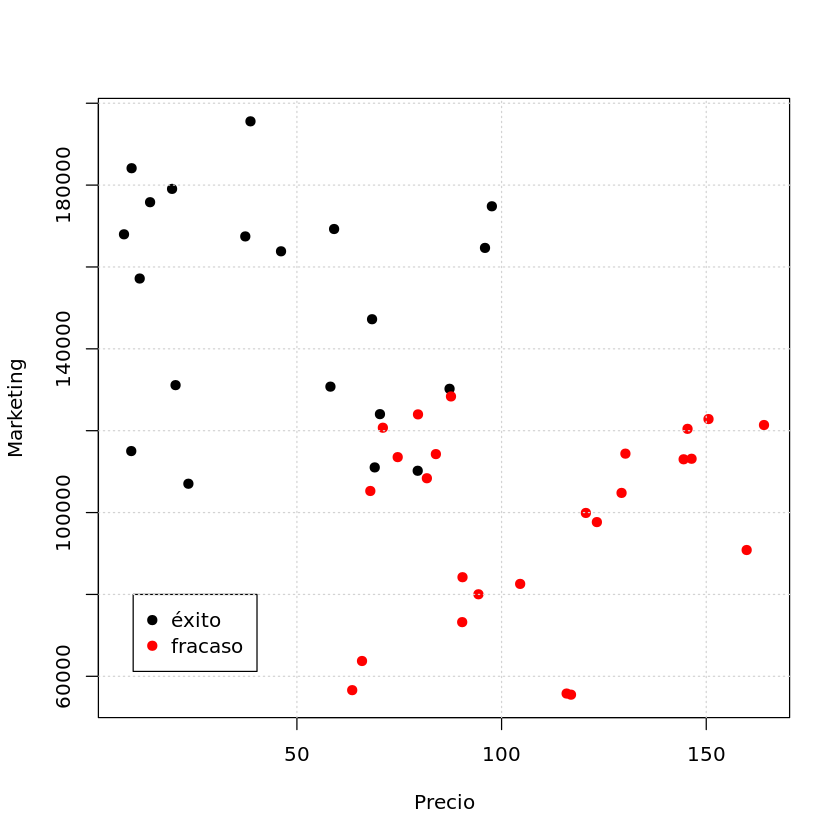

In [16]:
# Gráfica pedida en el punto a
producto = read.table('producto.txt',header = TRUE)
set.seed(123)
producto=producto[sample(nrow(producto), nrow(producto)), ]
plot(producto$Precio,producto$Marketing, col=c("black","red")[producto$Resultado],
     xlab = 'Precio', ylab = 'Marketing', pch = 19)
legend(x = 10, y = 80000, legend = c('éxito','fracaso'), col = c('black', 'red'), pch = 19)
grid()

In [17]:
producto[1,]

,Resultado,Precio,Marketing
13,exito,7.758767,167976.1


In [18]:
# Estandarización de datos
prod_std=std_df_meansd(producto[2:3])
print(head(prod_std$data))
print("Medias:")
print(head(prod_std$mean_val))
print("Desío Estandar:")
print(head(prod_std$sd_val))

       Precio  Marketing
13 -1.6534731  1.2818314
35  1.1063662 -0.4637006
18  0.3870099  1.4710163
38  0.9084470 -0.5989310
39 -0.3876609 -1.7950525
2   0.1523208  0.2390360
[1] "Medias:"
     Precio   Marketing 
    80.5818 121583.3024 
[1] "Desío Estandar:"
     Precio   Marketing 
   44.04246 36192.56165 


Se graficará el error en función de la cantidad de vecinos elegida para la clasificación.

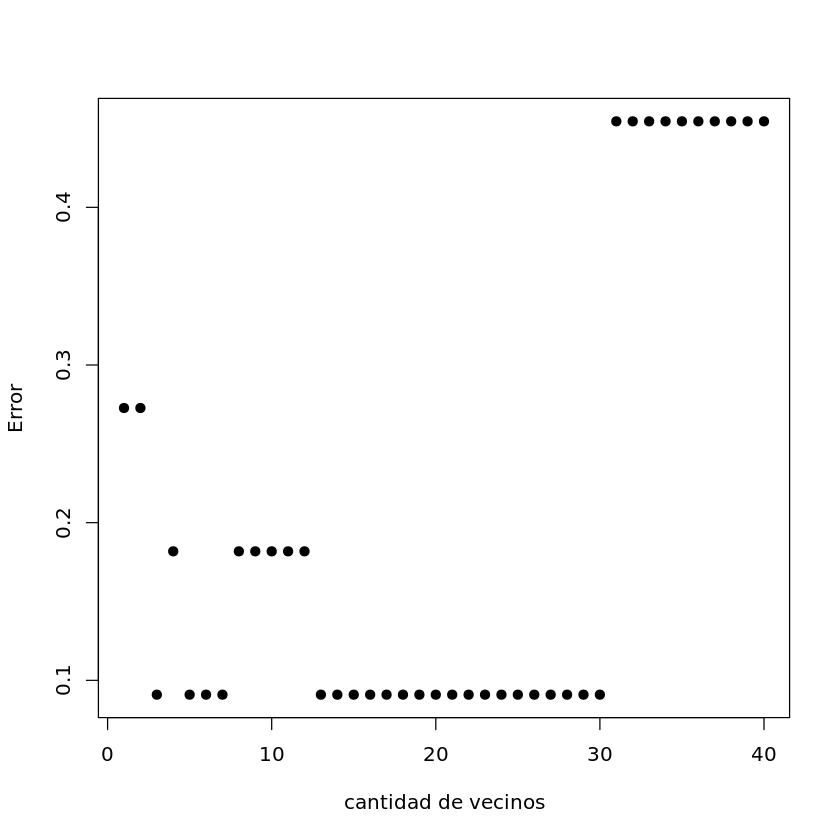

In [19]:
#genero train y test
prod_std$data$Resultado=producto$Resultado
data=ksplit(prod_std$data,4,2)

#pruebo para distintos valores de k
max_k=40
error <- array(0,max_k)
for(k in (1:max_k)){
    for(n in (1:nrow(data$test))){
        pred=knn(data$train[1:2],data$train[3],k,data$test[n,1:2])
        if(pred!=data$test[n,3]){
            error[k]=error[k]+1
        }
    }
    error[k]=error[k]/nrow(data$test)
}
plot(error,xlab = 'cantidad de vecinos', ylab = 'Error', pch = 19)

Siendo que es un dataset chico, esta curva de error puede depender fuertemente del test set elegido, veamos qué pasa si cambiamos las observaciones utilizadas para el test y graficamos el error para cada una de las 4 particiones que se pueden utilizar para test:

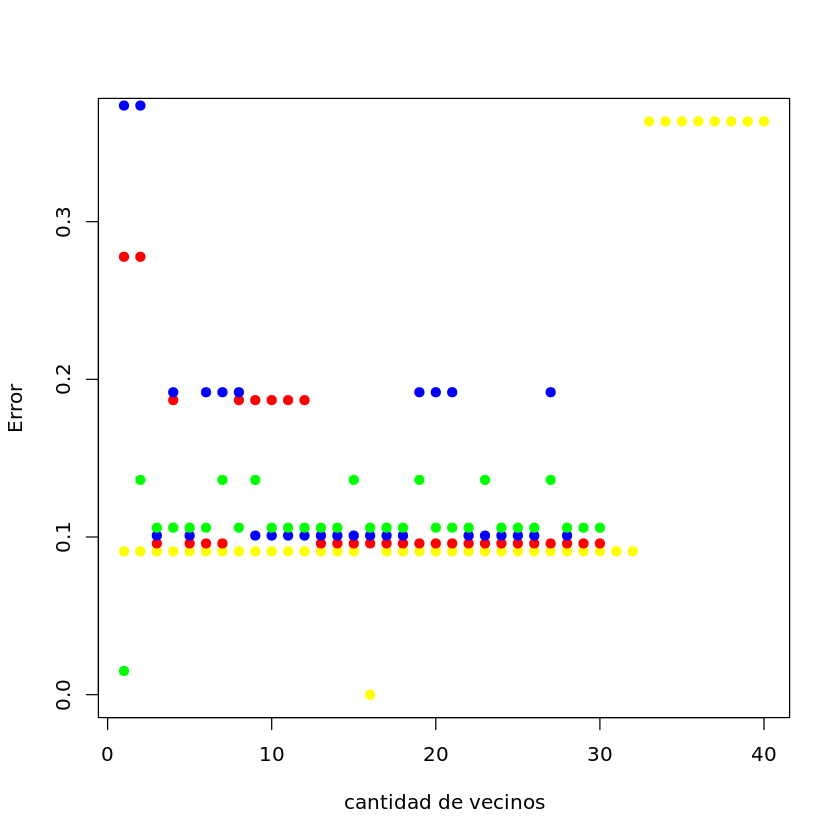

In [20]:
data=ksplit(prod_std$data,4,1)

#pruebo para distintos valores de k
max_k=40
error1 <- array(0,max_k)
for(k in (1:max_k)){
    for(n in (1:nrow(data$test))){
        pred=knn(data$train[1:2],data$train[3],k,data$test[n,1:2])
        if(pred!=data$test[n,3]){
            error1[k]=error1[k]+1
        }
    }
    error1[k]=error1[k]/nrow(data$test)
}
#pruebo para distintos valores de k
data=ksplit(prod_std$data,4,2)
error2 <- array(0,max_k)
for(k in (1:max_k)){
    for(n in (1:nrow(data$test))){
        pred=knn(data$train[1:2],data$train[3],k,data$test[n,1:2])
        if(pred!=data$test[n,3]){
            error2[k]=error2[k]+1
        }
    }
    error2[k]=error2[k]/nrow(data$test)
}
#pruebo para distintos valores de k
data=ksplit(prod_std$data,4,3)
error3 <- array(0,max_k)
for(k in (1:max_k)){
    for(n in (1:nrow(data$test))){
        pred=knn(data$train[1:2],data$train[3],k,data$test[n,1:2])
        if(pred!=data$test[n,3]){
            error3[k]=error3[k]+1
        }
    }
    error3[k]=error3[k]/nrow(data$test)
}
#pruebo para distintos valores de k
data=ksplit(prod_std$data,4,4)
error4 <- array(0,max_k)
for(k in (1:max_k)){
    for(n in (1:nrow(data$test))){
        pred=knn(data$train[1:2],data$train[3],k,data$test[n,1:2])
        if(pred!=data$test[n,3]){
            error4[k]=error4[k]+1
        }
    }
    error4[k]=error4[k]/nrow(data$test)
}
plot(error1,xlab = 'cantidad de vecinos', ylab = 'Error', pch = 19,col='yellow')
points(error2+0.005, col='red', pch = 19) 
points(error3+0.01, col='blue', pch = 19) 
points(error4+0.015, col='green', pch = 19) 

Se agregó una pequeña perturbación a cada una de las series de errores para poder visualizarlas mejor en el gráfico. Dado que la serie de errores en función de k es muy dependiente del test set que se tome, se aplicará la técnica de k-folding para determinar cuál es el valor de k óptimo. Siendo que se calcularon los errores para cada uno de las particiones de test por separado, lo único que restaría es sumar los errores entre sí, graficar la serie resultante, y seleccionar el valor de k que minimiza el error:

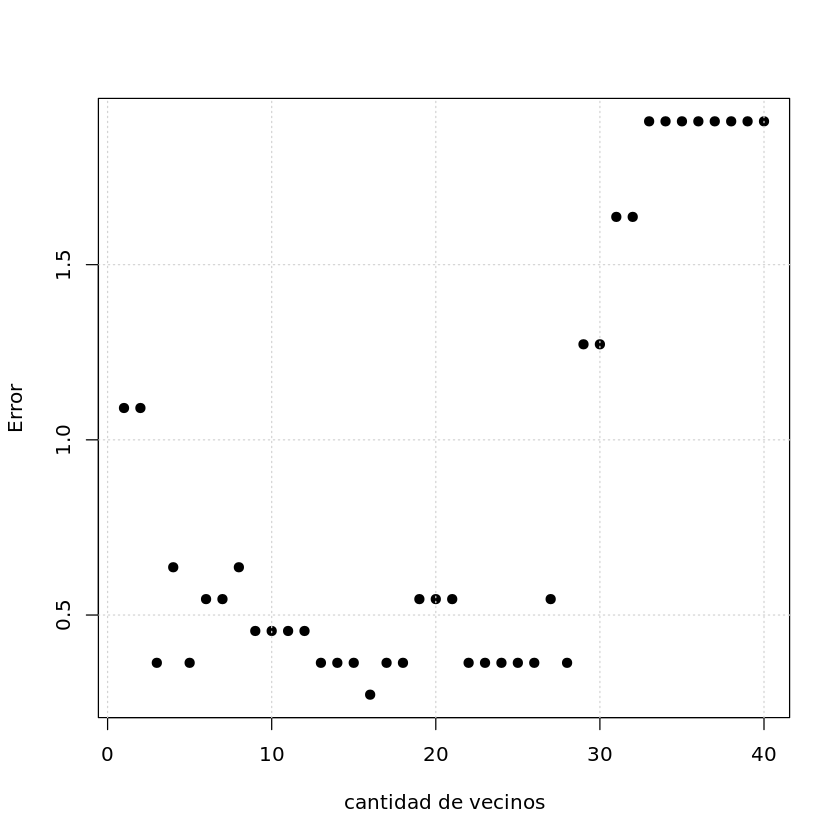

In [21]:
error=error1+error2+error3+error3
plot(error,xlab = 'cantidad de vecinos', ylab = 'Error', pch = 19,col='black')
grid()

El valor de k que minimiza la suma de los errores es 16. Se utilizará este valor y se hará una predicción para un producto con precio \$70 y un presupuesto de marketing de $100000. Lo primero que debemos hacer es normalizar dichos valores:

In [22]:
test2 <- data.frame("Precio" = as.double((70-prod_std$mean_val[1])/prod_std$sd_val[1]), 
                    "Marketing" = as.double((100000-prod_std$mean_val[2])/prod_std$sd_val[2]))


In [23]:
test2

Precio,Marketing
-0.2402635,-0.5963464


In [38]:
pred=knn(data$train[1:2],data$train[3],16,test2)
cat("La predicción para un producto con precio $70 y un presupuesto de marketing de $100000, tomando 16 vecinos es:")
print(pred)

La predicción para un producto con precio $70 y un presupuesto de marketing de $100000, tomando 16 vecinos es:[1] "fracaso"


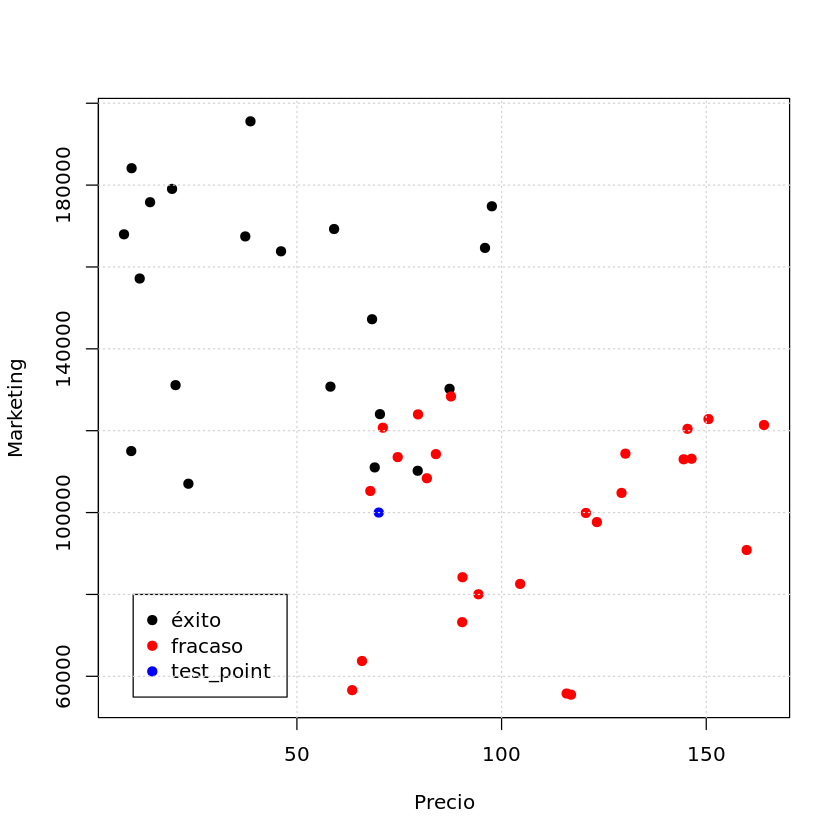

In [29]:
plot(producto$Precio,producto$Marketing, col=c("black","red")[producto$Resultado],
     xlab = 'Precio', ylab = 'Marketing', pch = 19)
legend(x = 10, y = 80000, legend = c('éxito','fracaso','test_point'), col = c('black', 'red','blu'), pch = 19)
points(70,100000, col="blue",pch=19)

grid()

## Leave One Out

Por último, se implementará la técnica k-folding Leave One Out para el mismo problema. La técnica consiste básicamente en tomar como cantidad de bloques de test, la cantidad de filas del dataset, con lo cual se puede implementar facilmente con las funciones ya escritas:

In [33]:
data=ksplit(prod_std$data,4,1)

#pruebo para distintos valores de k
max_k=40
cant_filas=nrow(prod_std$data)
error <- array(0,max_k)
for(n in (1:cant_filas)){
    data=ksplit(prod_std$data,cant_filas,n)
    for(k in (1:max_k)){
        pred=knn(data$train[1:2],data$train[3],k,data$test[1,1:2])
        if(pred!=data$test[1,3]){
            error[k]=error[k]+1
        }
    }
}

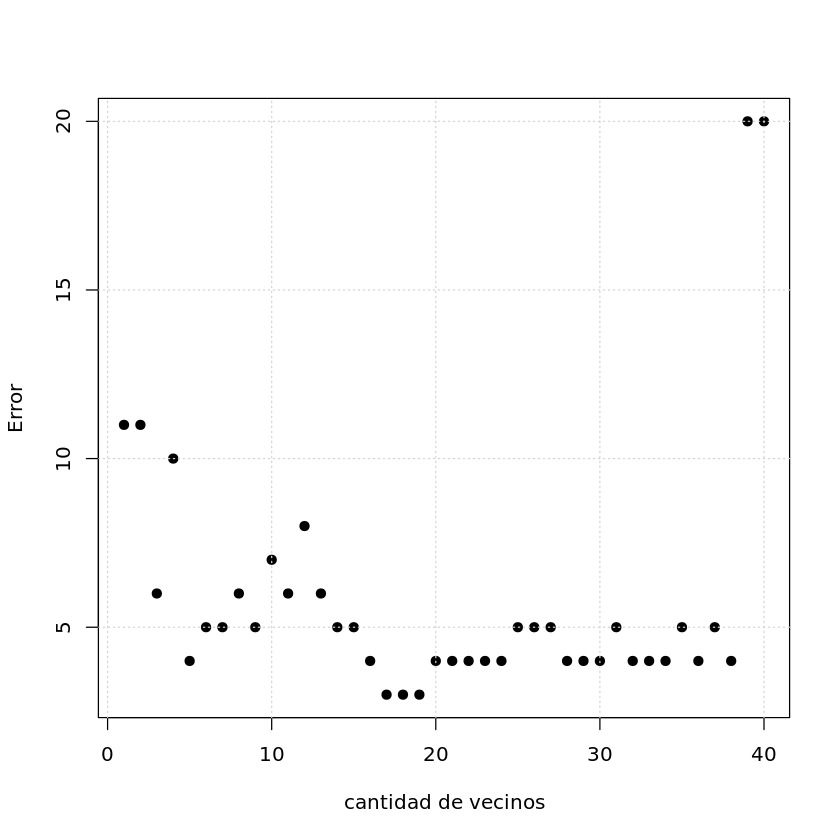

In [34]:
plot(error,xlab = 'cantidad de vecinos', ylab = 'Error', pch = 19,col='black')
grid()

In [37]:
pred=knn(data$train[1:2],data$train[3],19,test2)
cat("La predicción para un producto con precio $70 y un presupuesto de marketing de $100000,tomando 19 vecinos es:")
print(pred)

La predicción para un producto con precio $70 y un presupuesto de marketing de $100000,tomando 19 vecinos es:[1] "fracaso"


## Resumen y conclusiones

Se implementó un clasificador de vecinos mas cercanos (KNN) y se lo probó con el dataset de productos. Siendo que el dataset de productos es considerablemente chico, hacer la búsqueda del hiperparámetro k mediante el esquema test-train da resultados muy distintos dependiendo de qué partición del dataset se use para test.
Es por ello que se pasó a un esquema de k-folding cross-validation utilizando 4 bloques distintos de test, los cuales cubren exahustivamente el dataset. Utilizando este esquema se encontró que la cantidad de vecinos que minimizaba la suma de los errores es 16.
Por último, siendo que el dataset es considerablemente chico y en este caso el costo computacional no es un problema, se probó con la técnica k-folding Leave One Out, la cual solo deja una observación para testing en cada interación. Los valores de k que minimizan la suma de los errores son 17,18 y 19.

En conclusión, se vió que la técnica de k-folding es muy útil para la estimación de hiperparámetros de un modelo cuando el dataset es chico. Asi mismo se vió que para un test set de un cuarto del tamaño del dataset se encontró un valor aproximado de k bastante cercano al que se hubiera obtenido en el caso de aplicar Leave One Out.